In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv(r"C:\Users\Sejal\Downloads\bank_loan_dataset.csv")
df.head()

,Loan_ID,Age,Gender,Marital_Status,Dependents,Education,Employment_Type,Annual_Income,Loan_Amount,Loan_Tenure,Credit_Score,Property_Area,Loan_Status,Default_Flag
0,LN0000,59,Male,Single,2,Graduate,Salaried,324982,592601,24,B,Semi-Urban,Rejected,Yes
1,LN0001,49,Female,Single,3+,Graduate,Self-Employed,1505487,1213490,36,B,Urban,Rejected,Yes
2,LN0002,35,Female,Single,2,Not Graduate,Salaried,1317195,597993,12,D,Urban,Rejected,Yes
3,LN0003,63,Male,Single,2,Not Graduate,Salaried,1933264,153892,12,B,Urban,Approved,No
4,LN0004,28,Female,Single,2,Not Graduate,Salaried,508623,1362743,72,B,Rural,Rejected,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Loan_ID          500 non-null    object
 1   Age              500 non-null    int64 
 2   Gender           500 non-null    object
 3   Marital_Status   500 non-null    object
 4   Dependents       500 non-null    object
 5   Education        500 non-null    object
 6   Employment_Type  500 non-null    object
 7   Annual_Income    500 non-null    int64 
 8   Loan_Amount      500 non-null    int64 
 9   Loan_Tenure      500 non-null    int64 
 10  Credit_Score     500 non-null    object
 11  Property_Area    500 non-null    object
 12  Loan_Status      500 non-null    object
 13  Default_Flag     500 non-null    object
dtypes: int64(4), object(10)
memory usage: 54.8+ KB


In [5]:
df.shape

(500, 14)

In [7]:
df.columns

Index(['Loan_ID', 'Age', 'Gender', 'Marital_Status', 'Dependents', 'Education',
       'Employment_Type', 'Annual_Income', 'Loan_Amount', 'Loan_Tenure',
       'Credit_Score', 'Property_Area', 'Loan_Status', 'Default_Flag'],
      dtype='object')

In [9]:
df.isnull().sum()

Loan_ID            0
Age                0
Gender             0
Marital_Status     0
Dependents         0
Education          0
Employment_Type    0
Annual_Income      0
Loan_Amount        0
Loan_Tenure        0
Credit_Score       0
Property_Area      0
Loan_Status        0
Default_Flag       0
dtype: int64

In [10]:
df.describe()

,Age,Annual_Income,Loan_Amount,Loan_Tenure
count,500.000000,5.000000e+02,5.000000e+02,500.000000
mean,43.116000,1.147660e+06,7.803968e+05,42.072000
std,12.733217,5.243582e+05,4.218199e+05,20.490841
min,21.000000,2.031910e+05,5.753100e+04,12.000000
25%,32.000000,7.189798e+05,4.199268e+05,24.000000
50%,44.000000,1.180472e+06,7.730105e+05,36.000000
75%,53.000000,1.608620e+06,1.162686e+06,60.000000
max,64.000000,1.998806e+06,1.499796e+06,72.000000


In [13]:
df['Loan_Status'].value_counts()

Loan_Status
Approved    259
Rejected    241
Name: count, dtype: int64

In [14]:
loan_status = df['Loan_Status'].value_counts()
loan_status

Loan_Status
Approved    259
Rejected    241
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

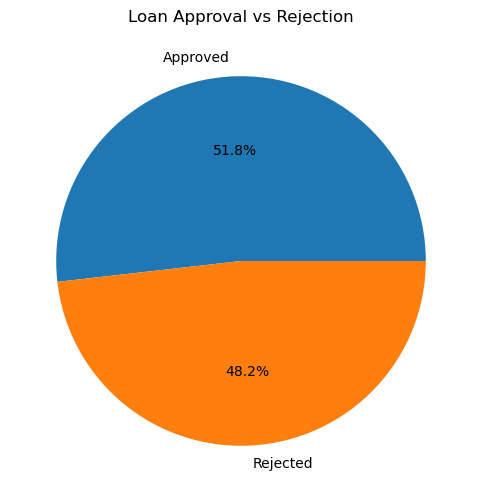

In [16]:
plt.figure(figsize=(6,6))
loan_status.plot(kind ='pie', autopct='%1.1f%%')
plt.title("Loan Approval vs Rejection")
plt.ylabel("")
plt.show

In [17]:
credit_default = df.groupby("Credit_Score")["Default_Flag"].value_counts().unstack().fillna(0)
print(credit_default)

Default_Flag  No  Yes
Credit_Score         
A             72   63
B             60   61
C             52   59
D             72   61


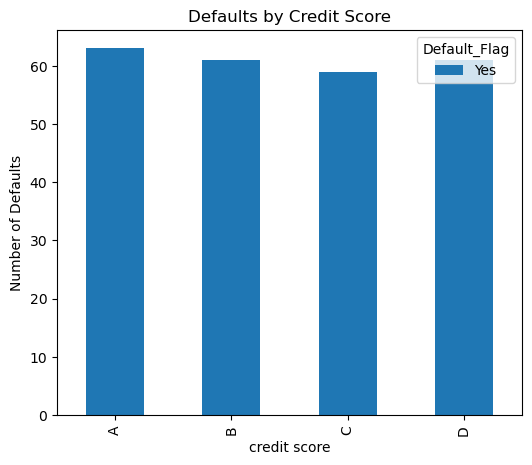

In [18]:
credit_default[['Yes']].plot(kind='bar',figsize=(6,5))
plt.title("Defaults by Credit Score")
plt.xlabel("credit score")
plt.ylabel("Number of Defaults")
plt.show()

In [24]:
emp_default = df.groupby("Employment_Type")["Default_Flag"].value_counts().unstack().fillna(0)
print(emp_default)


Default_Flag      No  Yes
Employment_Type          
Salaried         125  128
Self-Employed    131  116


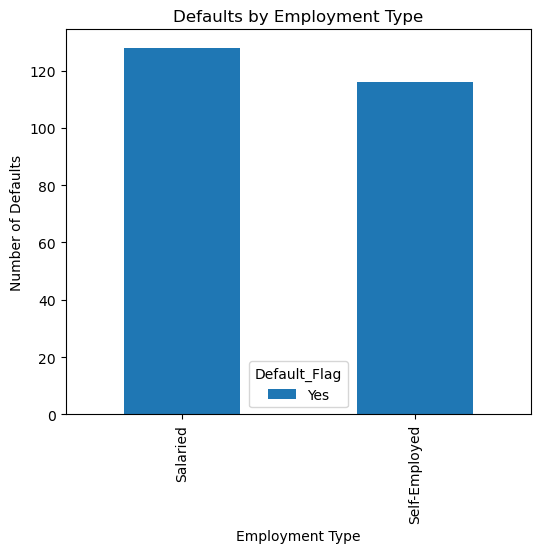

In [25]:
emp_default[['Yes']].plot(kind='bar',figsize=(6,5))
plt.title("Defaults by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Number of Defaults")
plt.show()

In [26]:
area_default = df.groupby("Property_Area")["Default_Flag"].value_counts().unstack().fillna(0)
print(area_default)


Default_Flag   No  Yes
Property_Area         
Rural          81   74
Semi-Urban     81   89
Urban          94   81


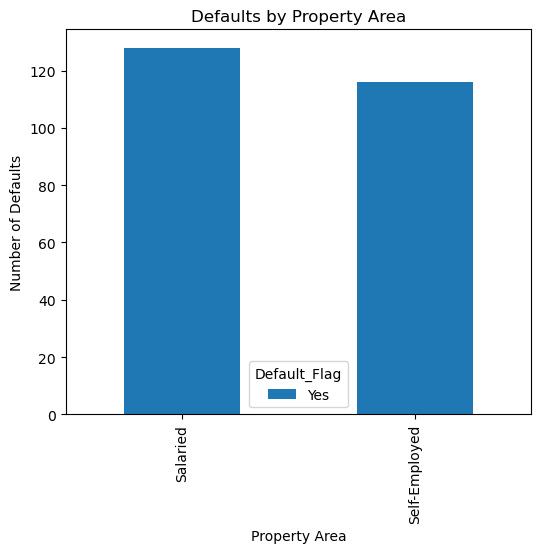

In [27]:
emp_default[['Yes']].plot(kind='bar',figsize=(6,5))
plt.title("Defaults by Property Area")
plt.xlabel("Property Area")
plt.ylabel("Number of Defaults")
plt.show()

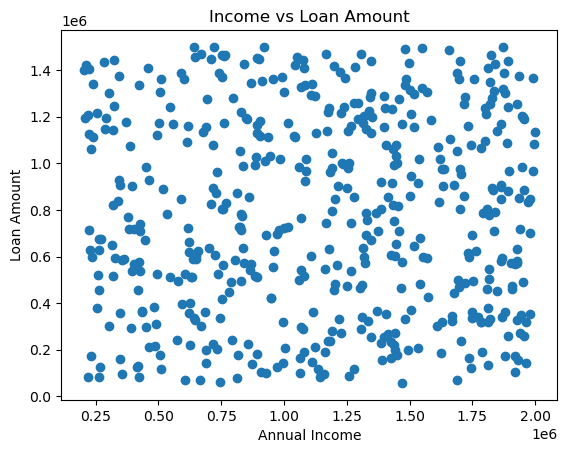

In [28]:
plt.scatter(df['Annual_Income'], df['Loan_Amount'])
plt.title("Income vs Loan Amount")
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.show()
